In [1]:
import os
os.chdir(r'C:\Users\82107\바탕 화면\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\바탕 화면\Study\ML learning


In [2]:
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np
# 데이터를 읽어오기 위한 pandas 모듈을 불러온다.
import pandas as pd 
# 선형회귀모형을 사용할 수 있는 모듈을 불러온다.
import statsmodels.api as sm
import statsmodels.formula.api as smf

default = pd.read_csv('Default.csv', encoding='cp949')
# 필요한 열만을 추출
default = default[['default', 'balance']]
# 데이터 확인
default.head()

,default,balance
0,No,729.526495
1,No,817.180407
2,No,1073.549164
3,No,529.250605
4,No,785.655883


In [4]:
x = default['balance']
#constant를 추가해줌
x = sm.add_constant(x)
x.iloc[:6, :]

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883
5,1.0,919.588530


In [5]:
# response variable인 default 변수를 dummy(0, 1) 변수 코딩
y = list(map(lambda x:1 if x == 'Yes' else 0, default['default']))
y[:6]

[0, 0, 0, 0, 0, 0]

In [6]:
# 선형 회귀모형 적합 linear fit
linear_reg = sm.OLS(y, x).fit()
# 적합 결과 확인
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.77e-286
Time:                        01:35:43   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

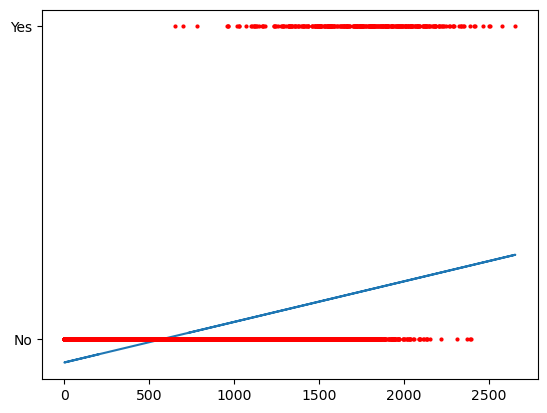

In [7]:
# 적합된 선형 회귀모형과 response variable의 시각화
import matplotlib.pyplot as plt
linear_reg_pred = linear_reg.predict(x)
plt.plot(default['balance'], linear_reg_pred) #x축 y축 순서
plt.plot(default['balance'], default['default'], 
         linestyle='none', marker='o', markersize=2, color='red')

#balance가 주어졌을 때 기본적으로 확률이 낮다고 예측함, default 값이 1인 것을 예측하지 못해줌

In [8]:
# logistic 회귀모형 적합
logistic_reg = sm.Logit(y, x).fit()
# 적합 결과 확인
logistic_reg.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.4534
Time:                        01:38:18   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

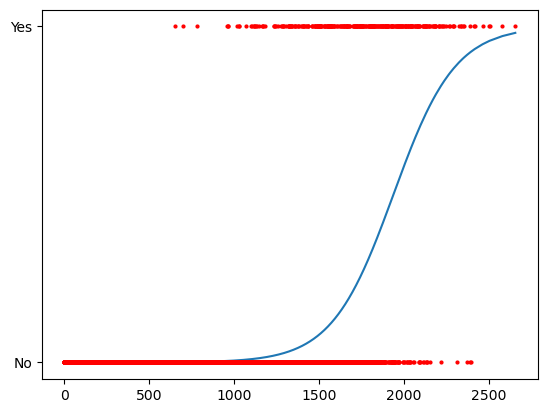

In [9]:
# 적합된 logistic 회귀모형과 response variable의 시각화
logistic_reg_pred = logistic_reg.predict(x)
plt.plot(np.sort(default['balance']), np.sort(logistic_reg_pred))
plt.plot(default['balance'], default['default'], 
         linestyle='none', marker='o', markersize=2, color='red')